 # Costa Rica - Balance ENERGÍA 2012-2018

## CONTEXTO DEL ANÁLISIS

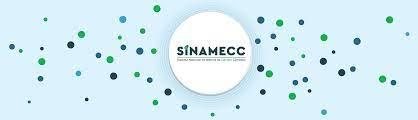

Con el objeto de "Monitorear el progreso de Costa Rica en el logro de sus metas climáticas y la implementación de políticas, planes y acciones climáticas con el fin de aumentar la transparencia, generar información de acceso abierto y facilitar el cumplimiento de los compromisos de informes nacionales e internacionales', el año 2018 se creó el Sistema Nacional de Métrica de Cambio Climático de Costa Rica (SINAMECC).

Según lo establece el decreto N° 41127-MINAE, "operará como un submódulo del Sistema Nacional de Información Ambiental (SINIA) y estará vinculado al Sistema de Estadística Nacional (SEN). La coordinación, operación y ejecución estará bajo la responsabilidad de la Dirección de Cambio Climático (DCC)."

Como parte de su labor de "generar información de acceso abierto", el SINAMECC cuenta con un repositorio de [datos abiertos](https://http://sinamecc.opendata.junar.com/home), montados sobre la plataforma de Jumar.

Como es usual en muchas instituciones, los datos provistos ya están resumidos. Es decir: no se ofrecen series temporales de registros para diferentes fuentes, sino solo cifras anuales. Esta práctica inhibe a los investigadores de conocer en mayor detalle los orígenes de los datos, y poder realizar otro tipo de análisis.

Adicionalmente, como es también usual en otras instituciones, las tablas resumen no simpre presentan formatos directamente aplicables al análisis. Suelen incluirse números con separadores de miles (formato texto), subtotales insertos en la tabla, totales, celdas vacías, etc.

Para efectos de este análisis, se usaron los datos del [Balance Nacional de Energía](https://http://sinamecc.opendata.junar.com/dashboards/21304/balance-nacional-de-energia-bne-prop-estr/), calculados y compilados por la Secretaría de Planificación del Subsector Energía ([SEPSE](https://https://sepse.go.cr/)), en las versiones provistos por Hakkoda para este reto en https://github.com/Hakkoda1/hakkathon-energy-data.

Según el propio SEPSE, "el Balance Energético Nacional es un análisis anual de la estructura energética del país, en el que se destacan los aspectos más relevantes tanto a nivel de sectores y actividades de la cadena energética como de las diferentes fuentes de energía primaria y secundaria."





## CARGA Y LIMPIEZA

Los archivos csv o json provistos en el mencionado repositorio se cargaron en [SNOWFLAKE](https://https://www.snowflake.com/), una plataforma de almacenamiento de datos (*data wharehousing*) en la nube, que se ofrece como software as a service (SaaS).

Para ello se crearon las estructuras básicas necesarias (almacén, bases de datos y esquemas), se crearon las tablas correspondientes y se subieron los datos, aprovechando la subida para realizar las transformaciones necesarias para que las tablas se apegaran a la estructura y formatos de una tabla (*data frame*) susceptible de ser manipulada, transformada y analizada utilizando algún lenguaje ad hoc (Python o R).

## CONEXIÓN CON PYTHON Y DESCARGA

Snowflake provee un conector que permite vincular la plataforma con el lenguaje Python. Ese conector se instaló y cargó, para poder proceder a crear una conexión específica con el almacen creado ad hoc en Snowflake.
Mediante ese conector se descargaron y verificaron las tablas, haciendo uso de la facilidad que brinda el conector de convertir esas tablas en data frames de Pandas, librería de Python especializada en el manejo de tablas.

## CONFIGURACIÓN DE ENTORNO

In [1]:
# Verificamos la versión de Python

!python --version

Python 3.7.6


Descargamos las bibliotecas dependientes requeridas para el conector

In [2]:
pip install -r https://raw.githubusercontent.com/snowflakedb/snowflake-connector-python/v2.7.6/tested_requirements/requirements_37.reqs


  Using cached snowflake_connector_python-2.7.4-cp37-cp37m-win_amd64.whl (7.6 MB)
  Attempting uninstall: snowflake-connector-python
    Found existing installation: snowflake-connector-python 2.7.6
    Uninstalling snowflake-connector-python-2.7.6:
      Successfully uninstalled snowflake-connector-python-2.7.6


Instalamos La versión adecuada del conector de SNOWFLAKE

In [3]:
pip install snowflake-connector-python==2.7.6

  Using cached snowflake_connector_python-2.7.6-cp37-cp37m-win_amd64.whl (7.6 MB)
  Attempting uninstall: snowflake-connector-python
    Found existing installation: snowflake-connector-python 2.7.4
    Uninstalling snowflake-connector-python-2.7.4:
      Successfully uninstalled snowflake-connector-python-2.7.4
Note: you may need to restart the kernel to use updated packages.


Nos aseguramos que el conector tenga la opción para trabajar con la biblioteca Pandas 

In [4]:
pip install "snowflake-connector-python[pandas]"

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Importamos el conector de Snowflake y establecemos la conexión con nuestra cuenta

import snowflake.connector

con = snowflake.connector.connect(
    user='greendatacr',
    password='*Inivfer22',
    account='CT59695.us-central1.gcp'
)

In [6]:
# Seleccionamos el entorno de Snowflake con el que queremos trabajar

con.cursor().execute("USE WAREHOUSE CLIMA")
con.cursor().execute("USE DATABASE CHA2022")
con.cursor().execute("USE SCHEMA PUBLIC")

In [7]:
# Creamos el cursor para la extracción de datos
 
cur = con.cursor()

### Consumo de energía en Costa Rica por subsector residencial (Terajoules) 2010-2018

In [8]:
# Carga de datos a un data frame de Pandas

cur.execute('select * from RESIDENCIAL')
RES = cur.fetch_pandas_all()

In [9]:
RES

,YEAR,URBANO,RURAL
0,2010,10514.0,12868.0
1,2011,11513.0,10626.0
2,2012,11950.0,9636.0
3,2013,12090.0,9276.0
4,2014,12606.0,7996.0
5,2015,13197.0,7594.0
6,2016,13459.0,7161.0
7,2017,13687.0,6964.0
8,2018,13521.0,5959.0


In [10]:
# Verificamos la cantidad de registros y el tipo de datos descargados

RES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    9 non-null      int16  
 1   URBANO  9 non-null      float64
 2   RURAL   9 non-null      float64
dtypes: float64(2), int16(1)
memory usage: 290.0 bytes


### Centros de transformación de energía por sector (Terajoules) 2010-2018

In [11]:
# Carga de datos a un data frame de Pandas

cur.execute('select * from CENTROSDETRANSFPORSECTOR')
CDTPS = cur.fetch_pandas_all()

In [12]:
CDTPS

,YEAR,CARBONERAS,REFINERIAS,CENTRALES_ELECTRICAS_SECTOR_PUBLICO,CENTRALES_ELECTRICAS_SECTOR_PRIVADO,DESTILERIAS
0,2010,-125.0,-300.0,-38773.0,-5389.0,597.0
1,2011,-97.0,-39.0,-39212.0,-5511.0,632.0
2,2012,-107.0,0.0,-42701.0,-5794.0,742.0
3,2013,-115.0,0.0,-46583.0,-5776.0,742.0
4,2014,-141.0,0.0,-45971.0,-5693.0,705.0
5,2015,-171.0,0.0,-40774.0,-6660.0,705.0
6,2016,-134.0,0.0,-40582.0,-7585.0,630.0
7,2017,-65.0,0.0,-41318.0,-6830.0,630.0
8,2018,-25.0,0.0,-29583.0,-1877.0,608.0


In [13]:
# Verificamos la cantidad de registros y el tipo de datos descargados

CDTPS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   YEAR                                 9 non-null      int16  
 1   CARBONERAS                           9 non-null      float64
 2   REFINERIAS                           9 non-null      float64
 3   CENTRALES_ELECTRICAS_SECTOR_PUBLICO  9 non-null      float64
 4   CENTRALES_ELECTRICAS_SECTOR_PRIVADO  9 non-null      float64
 5   DESTILERIAS                          9 non-null      float64
dtypes: float64(5), int16(1)
memory usage: 506.0 bytes


### Total del consumo de energía en Costa Rica por sector (Terajoules) 2010-2018

In [14]:
# Carga de datos a un data frame de Pandas

cur.execute('select * from CONSUMO_FINAL_POR_SECTOR')
CFPS = cur.fetch_pandas_all()

In [15]:
CFPS

,YEAR,RESIDENCIAL,SERVICIOS,COMERCIAL,PUBLICO,TRANSPORTE,INDUSTRIA,AGROPECUARIO
0,2010,23382.0,6146.0,3513.0,3869.0,70319.0,37995.0,2854.0
1,2011,22139.0,6087.0,3479.0,3951.0,72109.0,36973.0,3092.0
2,2012,21586.0,6206.0,3636.0,4230.0,74111.0,37740.0,3242.0
3,2013,21366.0,6246.0,3870.0,4296.0,74637.0,38994.0,3273.0
4,2014,20603.0,6417.0,3980.0,4454.0,76186.0,39206.0,3254.0
5,2015,20791.0,6671.0,4114.0,4575.0,81526.0,38368.0,3327.0
6,2016,20620.0,7042.0,4306.0,4687.0,87538.0,39728.0,3584.0
7,2017,20652.0,7175.0,4322.0,4690.0,89061.0,40047.0,3761.0
8,2018,19481.0,7303.0,4464.0,4803.0,91231.0,39262.0,3337.0


In [16]:
# Verificamos la cantidad de registros y el tipo de datos descargados

CFPS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YEAR          9 non-null      int16  
 1   RESIDENCIAL   9 non-null      float64
 2   SERVICIOS     9 non-null      float64
 3   COMERCIAL     9 non-null      float64
 4   PUBLICO       9 non-null      float64
 5   TRANSPORTE    9 non-null      float64
 6   INDUSTRIA     9 non-null      float64
 7   AGROPECUARIO  9 non-null      float64
dtypes: float64(7), int16(1)
memory usage: 650.0 bytes


### Total de la oferta interna de energía en Costa Rica (Terajoules) 2010-2018.

In [17]:
# Carga de datos a un data frame de Pandas

cur.execute('select * from OFERTA')
OFE = cur.fetch_pandas_all()

In [18]:
OFE

,YEAR,TRANSFERENCIAS,PRODUCCION,IMPORTACION,EXPORTACION,VARINVENTARIO,NOAPROVECHADA,OFERTAINTERNA
0,2010,53.0,124793.0,104819.0,5789.0,-617.0,22529.0,200729.0
1,2011,44.0,121627.0,105991.0,3469.0,-924.0,24332.0,198937.0
2,2012,-230.0,123614.0,105522.0,4902.0,2479.0,21636.0,204848.0
3,2013,75.0,125407.0,108967.0,4600.0,1960.0,20261.0,211549.0
4,2014,72.0,125189.0,112928.0,2826.0,-2063.0,19382.0,213919.0
5,2015,77.0,128647.0,107389.0,2950.0,-707.0,17392.0,215063.0
6,2016,-13.0,129472.0,115170.0,2925.0,420.0,17392.0,224733.0
7,2017,-56.0,132627.0,122745.0,3231.0,-2246.0,19280.0,230558.0
8,2018,-16.0,113220.0,117521.0,3462.0,2519.0,17886.0,211896.0


In [19]:
# Verificamos la cantidad de registros y el tipo de datos descargados

OFE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YEAR            9 non-null      int16  
 1   TRANSFERENCIAS  9 non-null      float64
 2   PRODUCCION      9 non-null      float64
 3   IMPORTACION     9 non-null      float64
 4   EXPORTACION     9 non-null      float64
 5   VARINVENTARIO   9 non-null      float64
 6   NOAPROVECHADA   9 non-null      float64
 7   OFERTAINTERNA   9 non-null      float64
dtypes: float64(7), int16(1)
memory usage: 650.0 bytes


### Consumo de energía en Costa Rica por el sector transporte (Terajoules) 2010-2018

In [20]:
# Carga de datos a un data frame de Pandas

cur.execute('select * from TRANSPORTE')
TRA = cur.fetch_pandas_all()

In [21]:
TRA

,YEAR,TERRESTRE,MARITIMO,AEREO
0,2010,63360.0,85.0,6874.0
1,2011,64876.0,84.0,7149.0
2,2012,66765.0,56.0,7290.0
3,2013,67772.0,90.0,6775.0
4,2014,69263.0,78.0,6845.0
5,2015,73986.0,91.0,7448.0
6,2016,79120.0,58.0,8360.0
7,2017,80669.0,65.0,8327.0
8,2018,81953.0,51.0,9227.0


In [22]:
# Verificamos la cantidad de registros y el tipo de datos descargados

TRA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YEAR       9 non-null      int16  
 1   TERRESTRE  9 non-null      float64
 2   MARITIMO   9 non-null      float64
 3   AEREO      9 non-null      float64
dtypes: float64(3), int16(1)
memory usage: 362.0 bytes


### Consumo de energía en Costa Rica por subsector industria (Terajoules) 2010-2018

In [23]:
# Carga de datos a un data frame de Pandas

cur.execute('select * from INDUSTRIA')
IND = cur.fetch_pandas_all()

In [24]:
IND

,YEAR,PRODUC_DE_ALIMENTOS_Y_TABACO,PRODUC_DE_TEXTILES_Y_CUERO,PRODUC_DE_MADERA,PRODUC_DE_PAPEL,PRODUC_DE_QUIMICOS,OTRAS_INDUSTRIAS
0,2010,22612.0,918.0,3485.0,1070.0,2076.0,7833.0
1,2011,17734.0,886.0,5713.0,1061.0,2048.0,9532.0
2,2012,18489.0,882.0,5917.0,1126.0,2069.0,9257.0
3,2013,19839.0,838.0,5877.0,1223.0,2000.0,9218.0
4,2014,19986.0,787.0,6055.0,1220.0,1948.0,9210.0
5,2015,19956.0,810.0,5534.0,1257.0,1870.0,8941.0
6,2016,20435.0,841.0,5704.0,1311.0,1899.0,9538.0
7,2017,20367.0,868.0,5131.0,1359.0,2084.0,10238.0
8,2018,20442.0,876.0,5086.0,1366.0,1974.0,9518.0


In [25]:
# Verificamos la cantidad de registros y el tipo de datos descargados

IND.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   YEAR                          9 non-null      int16  
 1   PRODUC_DE_ALIMENTOS_Y_TABACO  9 non-null      float64
 2   PRODUC_DE_TEXTILES_Y_CUERO    9 non-null      float64
 3   PRODUC_DE_MADERA              9 non-null      float64
 4   PRODUC_DE_PAPEL               9 non-null      float64
 5   PRODUC_DE_QUIMICOS            9 non-null      float64
 6   OTRAS_INDUSTRIAS              9 non-null      float64
dtypes: float64(6), int16(1)
memory usage: 578.0 bytes


### Total importaciones de energía en Costa Rica (Terajoules) 2010-2019

In [26]:
# Carga de datos a un data frame de Pandas

cur.execute('select * from IMPORTACIONES')
IMP = cur.fetch_pandas_all()

In [27]:
IMP

,YEAR,IMPORTACIONES
0,2010,104818.94
1,2011,105991.40
2,2012,105521.89
3,2013,108967.28
4,2014,112928.31
5,2015,107389.30
6,2016,115170.04
7,2017,122745.30
8,2018,117521.10
9,2019,123790.75


In [28]:
# Verificamos la cantidad de registros y el tipo de datos descargados

IMP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           11 non-null     object 
 1   IMPORTACIONES  11 non-null     float64
dtypes: float64(1), object(1)
memory usage: 304.0+ bytes


### Total generación eléctrica en Costa Rica por tipo de fuente (TJ) 2010-2019

In [29]:
# Carga de datos a un data frame de Pandas

cur.execute('select * from GENXTIPOFUENTE')
GPTDF = cur.fetch_pandas_all()

In [30]:
GPTDF

,YEAR,HIDRO,GEOTERMICA,EOLICA,BIOMASA,SOLAR,TERMICA,TOTAL
0,2010,26144.25,4233.89,1291.23,521.41,0.93,2308.23,34499.95
1,2011,25684.64,4606.35,1492.11,500.37,1.73,3108.03,35393.24
2,2012,26039.52,5049.18,1902.18,643.04,4.67,2989.02,36627.60
3,2013,24663.76,5460.25,1744.45,659.94,8.80,4305.59,36842.78
4,2014,24181.75,5537.29,2645.11,650.24,8.88,3755.53,36778.79
5,2015,29039.71,4952.26,3886.23,645.38,9.12,389.23,38921.94
6,2016,28893.40,4822.25,4130.25,617.42,8.69,694.89,39166.91
7,2017,31237.06,4024.20,4635.64,664.24,16.03,134.70,40711.86
8,2018,30034.43,3486.85,6475.95,625.19,201.76,570.78,41394.96
9,2019,28175.98,5445.27,6466.84,608.57,215.35,344.29,41256.29


In [31]:
# Verificamos la cantidad de registros y el tipo de datos descargados

GPTDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YEAR        11 non-null     object 
 1   HIDRO       11 non-null     float64
 2   GEOTERMICA  11 non-null     float64
 3   EOLICA      11 non-null     float64
 4   BIOMASA     11 non-null     float64
 5   SOLAR       11 non-null     float64
 6   TERMICA     11 non-null     float64
 7   TOTAL       11 non-null     float64
dtypes: float64(7), object(1)
memory usage: 832.0+ bytes


### Total consumo de energía en Costa Rica por tipo de fuente (Terajoules) 2010-2019

In [32]:
# Carga de datos a un data frame de Pandas

cur.execute('select * from CONSUMOXTIPOFUENTE')
CPTDF = cur.fetch_pandas_all()

In [33]:
CPTDF

,YEAR,CARBON_MINERAL,COQUE,LENHA,BAGAZO,OTROS_RES_VEG,CARBON_VEGETAL,CASC_DE_CAFE,BIOGAS,ELECTRICIDAD,GLP,GASOLINA_REGULAR,GASOLINA_SUPER,KEROSENE,JET_FUEL,AV_GAS,DIESEL,GASOLEO,FUEL_OIL,TOTAL
0,2010,29.89,2675.36,13998.14,9836.32,4395.70,41.80,375.26,0.00,30832.33,5404.43,19138.93,12426.14,128.74,7138.21,58.09,37366.90,230.96,5037.69,149114.89
1,2011,229.20,3717.92,12839.58,7729.44,4448.78,32.34,407.07,2.99,31223.25,5542.26,19073.05,13200.62,164.18,7436.25,55.96,37846.49,253.23,4776.77,148979.37
2,2012,91.97,3382.79,12161.88,8088.95,4385.46,35.59,461.19,3.03,32468.42,5708.17,19309.81,14356.44,282.75,7369.51,54.38,38341.17,280.72,5038.86,151821.08
3,2013,204.32,3359.27,12059.79,9864.93,4161.97,38.29,461.19,3.03,32767.30,6032.98,19657.83,14599.83,257.25,6869.56,52.24,38437.05,285.36,4530.13,153642.31
4,2014,248.10,3288.28,11066.46,10318.32,4360.37,47.01,371.96,3.03,31149.97,6479.78,19525.17,15559.74,261.09,6937.01,48.56,39234.72,275.64,4184.00,155359.20
5,2015,14.00,3211.70,10825.70,10072.36,3789.58,56.85,371.37,3.03,33942.28,6817.76,20132.66,17866.27,303.50,7575.90,48.37,41315.37,250.41,4199.91,160797.02
6,2016,13.51,3493.96,10170.89,10072.36,3742.20,44.58,437.15,3.03,35225.10,7464.69,20419.83,20610.48,287.68,8462.44,49.15,43900.44,290.26,4287.28,168975.04
7,2017,214.02,3786.46,10211.16,9359.19,3329.99,46.34,400.44,3.03,35642.33,7934.88,20565.07,21401.84,275.21,8446.03,53.16,44661.06,372.48,4273.74,170976.41
8,2018,13.87,3534.58,8603.49,9134.57,3224.83,42.19,347.55,3.03,35958.98,8215.20,20563.59,21740.81,245.85,9379.58,41.04,44766.79,393.71,4107.84,170317.49
9,2019,10.19,1728.44,8582.54,9060.66,3258.67,38.18,372.59,3.03,36573.21,8736.27,21566.84,22426.14,204.06,9973.41,41.83,44303.51,391.21,4145.23,171416.03


In [34]:
# Verificamos la cantidad de registros y el tipo de datos descargados

CPTDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              11 non-null     object 
 1   CARBON_MINERAL    11 non-null     float64
 2   COQUE             11 non-null     float64
 3   LENHA             11 non-null     float64
 4   BAGAZO            11 non-null     float64
 5   OTROS_RES_VEG     11 non-null     float64
 6   CARBON_VEGETAL    11 non-null     float64
 7   CASC_DE_CAFE      11 non-null     float64
 8   BIOGAS            11 non-null     float64
 9   ELECTRICIDAD      11 non-null     float64
 10  GLP               11 non-null     float64
 11  GASOLINA_REGULAR  11 non-null     float64
 12  GASOLINA_SUPER    11 non-null     float64
 13  KEROSENE          11 non-null     float64
 14  JET_FUEL          11 non-null     float64
 15  AV_GAS            11 non-null     float64
 16  DIESEL            11 non-null     float64
 17 

In [35]:
# Imprimimos la lista final de tablas creadas 
%whos DataFrame

Variable   Type         Data/Info
---------------------------------
CDTPS      DataFrame       YEAR  CARBONERAS  REFI<...>   -1877.0        608.0  
CFPS       DataFrame       YEAR  RESIDENCIAL  SER<...>61.0  \n8        3337.0  
CPTDF      DataFrame         YEAR  CARBON_MINERAL<...>8  44581.45  1601398.84  
GPTDF      DataFrame         YEAR      HIDRO  GEO<...>256.29  \n10  381594.32  
IMP        DataFrame         YEAR  IMPORTACIONES\<...>n10  Total     1124844.31
IND        DataFrame       YEAR  PRODUC_DE_ALIMEN<...>974.0            9518.0  
OFE        DataFrame       YEAR  TRANSFERENCIAS  <...> 17886.0       211896.0  
RES        DataFrame       YEAR   URBANO    RURAL<...>8  2018  13521.0   5959.0
TRA        DataFrame       YEAR  TERRESTRE  MARIT<...>81953.0      51.0  9227.0


### Total del consumo de energía en Costa Rica por sector y subsector (TJ) 2010-2018

In [36]:
# Carga de datos a un data frame de Pandas

cur.execute('select * from CONSUMO_FINAL')
CF = cur.fetch_pandas_all()

In [37]:
CF

,DESCRIPCION,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Consumo final total,152180.0,150782.0,154301.0,156069.0,157966.0,164134.0,173415.0,176835.0,176935.0
1,Consumo final (no energ.),3065.0,1802.0,2480.0,2427.0,2607.0,3337.0,4440.0,5541.0,5592.0
2,Consumo final (energético),149115.0,148979.0,151821.0,153642.0,155359.0,160797.0,168975.0,171294.0,171342.0
3,Residencial,23382.0,22139.0,21586.0,21366.0,20603.0,20791.0,20620.0,20652.0,19481.0
4,1. Urbano,10514.0,11513.0,11950.0,12090.0,12606.0,13197.0,13459.0,13687.0,13521.0
...,...,...,...,...,...,...,...,...,...,...
87,2014,20603.0,6417.0,3980.0,4454.0,76186.0,39206.0,3254.0,NaN,NaN
88,2015,20791.0,6671.0,4114.0,4575.0,81526.0,38368.0,3327.0,NaN,NaN
89,2016,20620.0,7042.0,4306.0,4687.0,87538.0,39728.0,3584.0,NaN,NaN
90,2017,20652.0,7175.0,4322.0,4690.0,89061.0,40047.0,3761.0,NaN,NaN


In [38]:
# Verificamos la cantidad de registros y el tipo de datos descargados

CF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DESCRIPCION  92 non-null     object 
 1   2010         92 non-null     float64
 2   2011         92 non-null     float64
 3   2012         92 non-null     float64
 4   2013         92 non-null     float64
 5   2014         92 non-null     float64
 6   2015         92 non-null     float64
 7   2016         92 non-null     float64
 8   2017         83 non-null     float64
 9   2018         83 non-null     float64
dtypes: float64(9), object(1)
memory usage: 7.3+ KB


### Centros de transformación de energía por sector (Terajoules) 2010-2018

In [39]:
# Carga de datos a un data frame de Pandas

cur.execute('select * from CENTROS_DE_TRANSFORMACION')
CDT = cur.fetch_pandas_all()

In [40]:
CDT

,DESCRIPCION,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Total Transformado,44588.0,44858.0,48601.0,52474.0,51805.0,47604.0,48301.0,48212.0,31484.0
1,Carboneras,125.0,97.0,107.0,115.0,141.0,171.0,134.0,65.0,25.0
2,Refinerías,300.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Centrales Eléctricas Sector Público,38773.0,39212.0,42701.0,46583.0,45971.0,40774.0,40582.0,41318.0,29583.0
4,Centrales Hidroeléctricas,1089.0,244.0,897.0,1171.0,1148.0,1359.0,785.0,1466.0,1413.0
5,Centrales Termoeléctricas,4905.0,5206.0,4251.0,6477.0,5955.0,558.0,987.0,244.0,818.0
6,Centrales Geotérmicas,32779.0,34249.0,39346.0,38935.0,38868.0,38857.0,38809.0,39608.0,27351.0
7,Centrales Eólicas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Centrales Solares,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Centrales Eléctricas Sector Privado,5389.0,5511.0,5794.0,5776.0,5693.0,6660.0,7585.0,6830.0,1877.0


In [41]:
# Verificamos la cantidad de registros y el tipo de datos descargados

CDT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DESCRIPCION  15 non-null     object 
 1   2010         15 non-null     float64
 2   2011         15 non-null     float64
 3   2012         15 non-null     float64
 4   2013         15 non-null     float64
 5   2014         15 non-null     float64
 6   2015         15 non-null     float64
 7   2016         15 non-null     float64
 8   2017         15 non-null     float64
 9   2018         15 non-null     float64
dtypes: float64(9), object(1)
memory usage: 1.3+ KB


## ANÁLISIS DE DATOS

La información provista en estas tablas puede agruparse según se trate de GENERACIÓN o de CONSUMO. La primera se desglosa en distintos CENTROS DE TRANSFORMACIÓN, y el segundo en distintos SECTORES.

Comenzamos con la OFERTA. "La oferta total de energía de Costa Rica está conformada por la energía generada a partir de productos energéticos tanto de origen nacional como importados." [BCCR - CUENTA
DE ENERGÍA 2017](https://www.bccr.fi.cr/indicadores-economicos/DocCuentaEnergia/Cuenta-energia-2017-2020.pdf).

Veamos los datos:

In [42]:
OFE

,YEAR,TRANSFERENCIAS,PRODUCCION,IMPORTACION,EXPORTACION,VARINVENTARIO,NOAPROVECHADA,OFERTAINTERNA
0,2010,53.0,124793.0,104819.0,5789.0,-617.0,22529.0,200729.0
1,2011,44.0,121627.0,105991.0,3469.0,-924.0,24332.0,198937.0
2,2012,-230.0,123614.0,105522.0,4902.0,2479.0,21636.0,204848.0
3,2013,75.0,125407.0,108967.0,4600.0,1960.0,20261.0,211549.0
4,2014,72.0,125189.0,112928.0,2826.0,-2063.0,19382.0,213919.0
5,2015,77.0,128647.0,107389.0,2950.0,-707.0,17392.0,215063.0
6,2016,-13.0,129472.0,115170.0,2925.0,420.0,17392.0,224733.0
7,2017,-56.0,132627.0,122745.0,3231.0,-2246.0,19280.0,230558.0
8,2018,-16.0,113220.0,117521.0,3462.0,2519.0,17886.0,211896.0


In [43]:
OFE.columns = ['Año', 'Transferencias', 'Producción', 'Importación', 'Exportación', 'Variación de Inventario', 'No aprovechada', 'Oferta Interna']

In [44]:
OFE

,Año,Transferencias,Producción,Importación,Exportación,Variación de Inventario,No aprovechada,Oferta Interna
0,2010,53.0,124793.0,104819.0,5789.0,-617.0,22529.0,200729.0
1,2011,44.0,121627.0,105991.0,3469.0,-924.0,24332.0,198937.0
2,2012,-230.0,123614.0,105522.0,4902.0,2479.0,21636.0,204848.0
3,2013,75.0,125407.0,108967.0,4600.0,1960.0,20261.0,211549.0
4,2014,72.0,125189.0,112928.0,2826.0,-2063.0,19382.0,213919.0
5,2015,77.0,128647.0,107389.0,2950.0,-707.0,17392.0,215063.0
6,2016,-13.0,129472.0,115170.0,2925.0,420.0,17392.0,224733.0
7,2017,-56.0,132627.0,122745.0,3231.0,-2246.0,19280.0,230558.0
8,2018,-16.0,113220.0,117521.0,3462.0,2519.0,17886.0,211896.0


Como puede verse, se trata de una serie de 9 años (del 2010 al 2018) que, muestra, en números enteros, la oferta energética total de país, compuesta por la sumatoria de la Producción más las Importaciones más la energía No Aprovechada, menos las Transferencias, la Exportación y la Variación de Inventario.

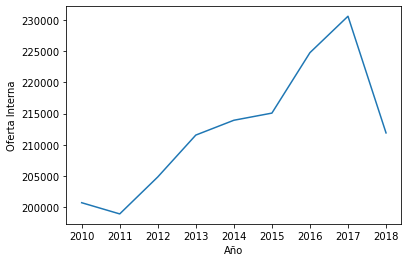

In [45]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.lineplot(data=OFE, x="Año", y="Oferta Interna")


Como puede observarse, la oferta interna mostraba una clara tendencia creciente, pasando de alrededor de 200 000 Terajulios (TJ) en 2010 y 2011, a 230 000 en el 2017, para volvar a caer a 212 000 en el 2018.

El factor clave parace estar el la Producción, que alcanzó un máximo de 133 000 TJ en 2017, para desplomarse a un mínimo histórico (para efectos de esta serie) de 113 000 TJ.




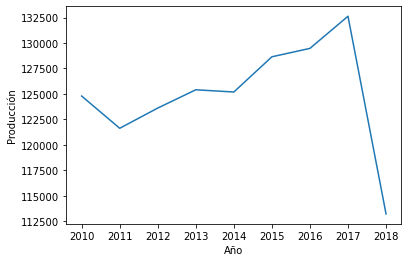

In [46]:
sns.lineplot(data=OFE, x="Año", y="Producción")


Quizás la mejor forma de ver esta evolución es comparar la evolución de los componentes por año.
Para ello, debemos comenzar por eliminar la columna "Oferta Interna", pues es solo el resultado de las operaciones realizadas sobre las demás columnas.

In [47]:
OFE_L = OFE.drop('Oferta Interna', axis = 1)
OFE_L

,Año,Transferencias,Producción,Importación,Exportación,Variación de Inventario,No aprovechada
0,2010,53.0,124793.0,104819.0,5789.0,-617.0,22529.0
1,2011,44.0,121627.0,105991.0,3469.0,-924.0,24332.0
2,2012,-230.0,123614.0,105522.0,4902.0,2479.0,21636.0
3,2013,75.0,125407.0,108967.0,4600.0,1960.0,20261.0
4,2014,72.0,125189.0,112928.0,2826.0,-2063.0,19382.0
5,2015,77.0,128647.0,107389.0,2950.0,-707.0,17392.0
6,2016,-13.0,129472.0,115170.0,2925.0,420.0,17392.0
7,2017,-56.0,132627.0,122745.0,3231.0,-2246.0,19280.0
8,2018,-16.0,113220.0,117521.0,3462.0,2519.0,17886.0


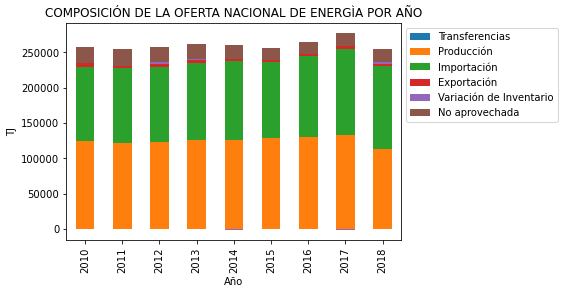

In [48]:
ax = OFE_L.set_index('Año').plot(kind='bar', stacked=True)

plt.xlabel('Año')
plt.ylabel('TJ')
plt.title('COMPOSICIÓN DE LA OFERTA NACIONAL DE ENERGÌA POR AÑO')

legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))

Como puede verse, los componentes de Importación y, principalmente, Producción, presentan reducciones significativas en el 2018.
El conjunto de datos provisto, incluye una tabla con datos de importación, que resultaría redundante e inncecesaria si los datos que contiene coninciden con los de la columna Importación de esta tabla de Oferta. Vamos a examinarlo.

In [49]:
IMP

,YEAR,IMPORTACIONES
0,2010,104818.94
1,2011,105991.40
2,2012,105521.89
3,2013,108967.28
4,2014,112928.31
5,2015,107389.30
6,2016,115170.04
7,2017,122745.30
8,2018,117521.10
9,2019,123790.75


Como podemos ver, esta tabla incluye tanto un "Total" (que es innecesario, pues podemos totalizar cuando queramos, indpendientemente de los años comprendidos en la tabla), como un registro para el año 2019, que no figura en la tabla de oferta.
Para poder compara los datos, vamos a eliminar ambas filas y comparar los datos de importaciones de ambas tablas.
Eliminamos la fila "Total"

In [50]:
IMP_L = IMP.drop(index=10)
IMP_L

,YEAR,IMPORTACIONES
0,2010,104818.94
1,2011,105991.40
2,2012,105521.89
3,2013,108967.28
4,2014,112928.31
5,2015,107389.30
6,2016,115170.04
7,2017,122745.30
8,2018,117521.10
9,2019,123790.75


In [51]:
IMP_OFE = OFE.iloc[:,3]
IMP_OFE

0    104819.0
1    105991.0
2    105522.0
3    108967.0
4    112928.0
5    107389.0
6    115170.0
7    122745.0
8    117521.0
Name: Importación, dtype: float64

In [52]:
NEW_IMP = IMP_L.assign(Importación = IMP_OFE)


In [53]:
NEW_IMP

,YEAR,IMPORTACIONES,Importación
0,2010,104818.94,104819.0
1,2011,105991.40,105991.0
2,2012,105521.89,105522.0
3,2013,108967.28,108967.0
4,2014,112928.31,112928.0
5,2015,107389.30,107389.0
6,2016,115170.04,115170.0
7,2017,122745.30,122745.0
8,2018,117521.10,117521.0
9,2019,123790.75,NaN


Como podemos ver, la tabla Importaciones registra los mismos valores que la columna Importación de la tabla Oferta, con la excepción de que este último redondea a unidades lo que la otra tabla ofrece en centésimas.
Para efectos prácticos, la tabla Importaciones no añade información que no tuviéramos antes, excepción hecha del dato del 2019.
Definida la oferta total de energía disponible, veamos como se consume esta energía.
Comencemos por el Consumo Final por Sector, que resume a un nivel máximo de granularidad, cuáles son los sectores que consumen, proporionalmente, más energía.


In [54]:
CFPS.columns = ['Año', 'Residencial', 'Servicios', 'Comercial', 'Público', 'Transporte', 'Industria', 'Agropecuario']  
CFPS

,Año,Residencial,Servicios,Comercial,Público,Transporte,Industria,Agropecuario
0,2010,23382.0,6146.0,3513.0,3869.0,70319.0,37995.0,2854.0
1,2011,22139.0,6087.0,3479.0,3951.0,72109.0,36973.0,3092.0
2,2012,21586.0,6206.0,3636.0,4230.0,74111.0,37740.0,3242.0
3,2013,21366.0,6246.0,3870.0,4296.0,74637.0,38994.0,3273.0
4,2014,20603.0,6417.0,3980.0,4454.0,76186.0,39206.0,3254.0
5,2015,20791.0,6671.0,4114.0,4575.0,81526.0,38368.0,3327.0
6,2016,20620.0,7042.0,4306.0,4687.0,87538.0,39728.0,3584.0
7,2017,20652.0,7175.0,4322.0,4690.0,89061.0,40047.0,3761.0
8,2018,19481.0,7303.0,4464.0,4803.0,91231.0,39262.0,3337.0


Podemos ver aquí, en esta tabla, como se distribuye el consumo nacional (que se presume total) entre los diferentes sectores.
Veamos la evolución de ese consumo.
Primero, calculemos un total para estos tipos de consumo

In [56]:
CFPS['Total'] = CFPS.iloc[:,1:8].sum(axis = 1)
CFPS


,Año,Residencial,Servicios,Comercial,Público,Transporte,Industria,Agropecuario,Total
0,2010,23382.0,6146.0,3513.0,3869.0,70319.0,37995.0,2854.0,148078.0
1,2011,22139.0,6087.0,3479.0,3951.0,72109.0,36973.0,3092.0,147830.0
2,2012,21586.0,6206.0,3636.0,4230.0,74111.0,37740.0,3242.0,150751.0
3,2013,21366.0,6246.0,3870.0,4296.0,74637.0,38994.0,3273.0,152682.0
4,2014,20603.0,6417.0,3980.0,4454.0,76186.0,39206.0,3254.0,154100.0
5,2015,20791.0,6671.0,4114.0,4575.0,81526.0,38368.0,3327.0,159372.0
6,2016,20620.0,7042.0,4306.0,4687.0,87538.0,39728.0,3584.0,167505.0
7,2017,20652.0,7175.0,4322.0,4690.0,89061.0,40047.0,3761.0,169708.0
8,2018,19481.0,7303.0,4464.0,4803.0,91231.0,39262.0,3337.0,169881.0


Vemos que 3 de los sectores coinciden con tablas porvistas eneste conjunto de  datos. Comparémoslas.

In [57]:
CONS_RES = CFPS.iloc[:,1]
CONS_RES

0    23382.0
1    22139.0
2    21586.0
3    21366.0
4    20603.0
5    20791.0
6    20620.0
7    20652.0
8    19481.0
Name: Residencial, dtype: float64

In [58]:
RES

,YEAR,URBANO,RURAL
0,2010,10514.0,12868.0
1,2011,11513.0,10626.0
2,2012,11950.0,9636.0
3,2013,12090.0,9276.0
4,2014,12606.0,7996.0
5,2015,13197.0,7594.0
6,2016,13459.0,7161.0
7,2017,13687.0,6964.0
8,2018,13521.0,5959.0


Veamos ahora la tabla Residencial:

In [59]:
RES.columns = ['Año', 'Urbano', 'Rural']
RES

,Año,Urbano,Rural
0,2010,10514.0,12868.0
1,2011,11513.0,10626.0
2,2012,11950.0,9636.0
3,2013,12090.0,9276.0
4,2014,12606.0,7996.0
5,2015,13197.0,7594.0
6,2016,13459.0,7161.0
7,2017,13687.0,6964.0
8,2018,13521.0,5959.0


Vemos que carece de un total, por lo que vamos a crearlo.

In [60]:
RES['Total'] = RES['Urbano'] + RES['Rural']
RES

,Año,Urbano,Rural,Total
0,2010,10514.0,12868.0,23382.0
1,2011,11513.0,10626.0,22139.0
2,2012,11950.0,9636.0,21586.0
3,2013,12090.0,9276.0,21366.0
4,2014,12606.0,7996.0,20602.0
5,2015,13197.0,7594.0,20791.0
6,2016,13459.0,7161.0,20620.0
7,2017,13687.0,6964.0,20651.0
8,2018,13521.0,5959.0,19480.0


Creado ese total, vamos a compararlo con la tabla Residencial, que parece ser redundante. más no innecesaria, pues aunque su información ya se encuentra contenida en la tabla Consumo Final Por Sector, en esta no se detalla en desglose entre el consumo residencial Urbano y el rural.

In [61]:
NEW_RES= RES.assign(Residencial_TOTAL= CONS_RES)
NEW_RES

,Año,Urbano,Rural,Total,Residencial_TOTAL
0,2010,10514.0,12868.0,23382.0,23382.0
1,2011,11513.0,10626.0,22139.0,22139.0
2,2012,11950.0,9636.0,21586.0,21586.0
3,2013,12090.0,9276.0,21366.0,21366.0
4,2014,12606.0,7996.0,20602.0,20603.0
5,2015,13197.0,7594.0,20791.0,20791.0
6,2016,13459.0,7161.0,20620.0,20620.0
7,2017,13687.0,6964.0,20651.0,20652.0
8,2018,13521.0,5959.0,19480.0,19481.0


Estimaremos ahora las diferencias entre ambas estinmaciones del consumo Residencial.

In [62]:
DIF = NEW_RES['Total']-NEW_RES['Residencial_TOTAL']
DIF

0    0.0
1    0.0
2    0.0
3    0.0
4   -1.0
5    0.0
6    0.0
7   -1.0
8   -1.0
dtype: float64

Como podemos ver, fuera de factores de redondeo, no parece  haber mayor diferencia entre ambos rubros.

Reallizaremos ahora el mismo ejercicio para los sectores Industrial y de Transporte, que cuentan con tablas de datos propias.
Veamos primero el sector Industrial.

In [63]:
IND

,YEAR,PRODUC_DE_ALIMENTOS_Y_TABACO,PRODUC_DE_TEXTILES_Y_CUERO,PRODUC_DE_MADERA,PRODUC_DE_PAPEL,PRODUC_DE_QUIMICOS,OTRAS_INDUSTRIAS
0,2010,22612.0,918.0,3485.0,1070.0,2076.0,7833.0
1,2011,17734.0,886.0,5713.0,1061.0,2048.0,9532.0
2,2012,18489.0,882.0,5917.0,1126.0,2069.0,9257.0
3,2013,19839.0,838.0,5877.0,1223.0,2000.0,9218.0
4,2014,19986.0,787.0,6055.0,1220.0,1948.0,9210.0
5,2015,19956.0,810.0,5534.0,1257.0,1870.0,8941.0
6,2016,20435.0,841.0,5704.0,1311.0,1899.0,9538.0
7,2017,20367.0,868.0,5131.0,1359.0,2084.0,10238.0
8,2018,20442.0,876.0,5086.0,1366.0,1974.0,9518.0


Como podemos ver, al igual que sucedía con el sector Residencial, esta tabla ofrece un desglose del consumo del sector Industrial, pero carece de un total, por lo que vamos a incorporarlo.


In [64]:
IND.columns = ['Año',	'ALIMENTOS Y TABACO', 'TEXTILES Y CUERO',	'MADERA', 'PAPEL', 'QUIMICOS',	'OTRAS INDUSTRIAS']
IND

,Año,ALIMENTOS Y TABACO,TEXTILES Y CUERO,MADERA,PAPEL,QUIMICOS,OTRAS INDUSTRIAS
0,2010,22612.0,918.0,3485.0,1070.0,2076.0,7833.0
1,2011,17734.0,886.0,5713.0,1061.0,2048.0,9532.0
2,2012,18489.0,882.0,5917.0,1126.0,2069.0,9257.0
3,2013,19839.0,838.0,5877.0,1223.0,2000.0,9218.0
4,2014,19986.0,787.0,6055.0,1220.0,1948.0,9210.0
5,2015,19956.0,810.0,5534.0,1257.0,1870.0,8941.0
6,2016,20435.0,841.0,5704.0,1311.0,1899.0,9538.0
7,2017,20367.0,868.0,5131.0,1359.0,2084.0,10238.0
8,2018,20442.0,876.0,5086.0,1366.0,1974.0,9518.0


In [65]:
IND['Total']=IND.iloc[:,1:7].sum(axis=1)
IND

,Año,ALIMENTOS Y TABACO,TEXTILES Y CUERO,MADERA,PAPEL,QUIMICOS,OTRAS INDUSTRIAS,Total
0,2010,22612.0,918.0,3485.0,1070.0,2076.0,7833.0,37994.0
1,2011,17734.0,886.0,5713.0,1061.0,2048.0,9532.0,36974.0
2,2012,18489.0,882.0,5917.0,1126.0,2069.0,9257.0,37740.0
3,2013,19839.0,838.0,5877.0,1223.0,2000.0,9218.0,38995.0
4,2014,19986.0,787.0,6055.0,1220.0,1948.0,9210.0,39206.0
5,2015,19956.0,810.0,5534.0,1257.0,1870.0,8941.0,38368.0
6,2016,20435.0,841.0,5704.0,1311.0,1899.0,9538.0,39728.0
7,2017,20367.0,868.0,5131.0,1359.0,2084.0,10238.0,40047.0
8,2018,20442.0,876.0,5086.0,1366.0,1974.0,9518.0,39262.0


Vamos a comparar estas cifras con las reportadas en el rubro Industria de la tabla de Consumo Final por Sector

In [66]:
CONS_IND = CFPS.iloc[:,6]
CONS_IND

0    37995.0
1    36973.0
2    37740.0
3    38994.0
4    39206.0
5    38368.0
6    39728.0
7    40047.0
8    39262.0
Name: Industria, dtype: float64

In [67]:
DIF = CONS_IND-IND['Total']
DIF

0    1.0
1   -1.0
2    0.0
3   -1.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
dtype: float64

Como veíamos en el sector Residencial, en el sector Industrial las diferencias entre el total recogido en el Consumo por sector y el total  asumiendo su desglose, es de redondeo.

Finalmente, realizaremos el mismo ejercicio para el sector Transporte.

In [68]:
TRA

,YEAR,TERRESTRE,MARITIMO,AEREO
0,2010,63360.0,85.0,6874.0
1,2011,64876.0,84.0,7149.0
2,2012,66765.0,56.0,7290.0
3,2013,67772.0,90.0,6775.0
4,2014,69263.0,78.0,6845.0
5,2015,73986.0,91.0,7448.0
6,2016,79120.0,58.0,8360.0
7,2017,80669.0,65.0,8327.0
8,2018,81953.0,51.0,9227.0


Como sucedía con el sector Residencial o Industrial, esta tabla ofrece un desglose del consumo del sector Transporte, pero carece de un total, por lo que vamos a incorporarlo.


In [69]:
TRA.columns = ['Año',	'TERRESTRE',	'MARÍTIMO',	'AÉREO']
TRA

,Año,TERRESTRE,MARÍTIMO,AÉREO
0,2010,63360.0,85.0,6874.0
1,2011,64876.0,84.0,7149.0
2,2012,66765.0,56.0,7290.0
3,2013,67772.0,90.0,6775.0
4,2014,69263.0,78.0,6845.0
5,2015,73986.0,91.0,7448.0
6,2016,79120.0,58.0,8360.0
7,2017,80669.0,65.0,8327.0
8,2018,81953.0,51.0,9227.0


In [70]:
TRA['Total']=TRA.iloc[:,1:4].sum(axis=1)
TRA

,Año,TERRESTRE,MARÍTIMO,AÉREO,Total
0,2010,63360.0,85.0,6874.0,70319.0
1,2011,64876.0,84.0,7149.0,72109.0
2,2012,66765.0,56.0,7290.0,74111.0
3,2013,67772.0,90.0,6775.0,74637.0
4,2014,69263.0,78.0,6845.0,76186.0
5,2015,73986.0,91.0,7448.0,81525.0
6,2016,79120.0,58.0,8360.0,87538.0
7,2017,80669.0,65.0,8327.0,89061.0
8,2018,81953.0,51.0,9227.0,91231.0


In [71]:
CONS_TRA = CFPS.iloc[:,5]
CONS_TRA

0    70319.0
1    72109.0
2    74111.0
3    74637.0
4    76186.0
5    81526.0
6    87538.0
7    89061.0
8    91231.0
Name: Transporte, dtype: float64

In [72]:
DIF = CONS_TRA-TRA['Total']
DIF

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    1.0
6    0.0
7    0.0
8    0.0
dtype: float64

Como veíamos en los sectores Residencial e Indutrial, en el sector Transporte las diferencias entre el total recogido en el Consumo por sector y el total  asumiendo su desglose, es de redondeo.

Esta forma de presentar la información en tablas diferentes es propia del uso de hojas de cáculo en el manejo de información, pero en plataformas de análisis de datos no es necesario hacer estas separaciones pues todos los datos pueden estructurarse en una misma tabla y ser analizados desde ahí.

Así, podemos construir un tabla de CONSUMO CONSOLIDADO. Veamos.


In [73]:
# Copiamos primero la tabla originial de Consumo Total por Sector
CC = CFPS
CC


,Año,Residencial,Servicios,Comercial,Público,Transporte,Industria,Agropecuario,Total
0,2010,23382.0,6146.0,3513.0,3869.0,70319.0,37995.0,2854.0,148078.0
1,2011,22139.0,6087.0,3479.0,3951.0,72109.0,36973.0,3092.0,147830.0
2,2012,21586.0,6206.0,3636.0,4230.0,74111.0,37740.0,3242.0,150751.0
3,2013,21366.0,6246.0,3870.0,4296.0,74637.0,38994.0,3273.0,152682.0
4,2014,20603.0,6417.0,3980.0,4454.0,76186.0,39206.0,3254.0,154100.0
5,2015,20791.0,6671.0,4114.0,4575.0,81526.0,38368.0,3327.0,159372.0
6,2016,20620.0,7042.0,4306.0,4687.0,87538.0,39728.0,3584.0,167505.0
7,2017,20652.0,7175.0,4322.0,4690.0,89061.0,40047.0,3761.0,169708.0
8,2018,19481.0,7303.0,4464.0,4803.0,91231.0,39262.0,3337.0,169881.0


In [74]:
# A continuación, eliminamos las columnas correspondientes a los sectores Redidencial, Trasnporte e Industria
CC = CC.drop(['Residencial', 'Transporte', 'Industria'], axis = 1)
CC

,Año,Servicios,Comercial,Público,Agropecuario,Total
0,2010,6146.0,3513.0,3869.0,2854.0,148078.0
1,2011,6087.0,3479.0,3951.0,3092.0,147830.0
2,2012,6206.0,3636.0,4230.0,3242.0,150751.0
3,2013,6246.0,3870.0,4296.0,3273.0,152682.0
4,2014,6417.0,3980.0,4454.0,3254.0,154100.0
5,2015,6671.0,4114.0,4575.0,3327.0,159372.0
6,2016,7042.0,4306.0,4687.0,3584.0,167505.0
7,2017,7175.0,4322.0,4690.0,3761.0,169708.0
8,2018,7303.0,4464.0,4803.0,3337.0,169881.0


In [75]:
# Reemplazamos la antigua columna Residencial por las columnas Residencial - Urbano y Residencial - Rural

CC.insert(loc = 1, column = 'Residencial - Urbano', value = RES['Urbano'])
CC.insert(loc = 2, column = 'Residencial - Rural', value = RES['Rural'])
CC

,Año,Residencial - Urbano,Residencial - Rural,Servicios,Comercial,Público,Agropecuario,Total
0,2010,10514.0,12868.0,6146.0,3513.0,3869.0,2854.0,148078.0
1,2011,11513.0,10626.0,6087.0,3479.0,3951.0,3092.0,147830.0
2,2012,11950.0,9636.0,6206.0,3636.0,4230.0,3242.0,150751.0
3,2013,12090.0,9276.0,6246.0,3870.0,4296.0,3273.0,152682.0
4,2014,12606.0,7996.0,6417.0,3980.0,4454.0,3254.0,154100.0
5,2015,13197.0,7594.0,6671.0,4114.0,4575.0,3327.0,159372.0
6,2016,13459.0,7161.0,7042.0,4306.0,4687.0,3584.0,167505.0
7,2017,13687.0,6964.0,7175.0,4322.0,4690.0,3761.0,169708.0
8,2018,13521.0,5959.0,7303.0,4464.0,4803.0,3337.0,169881.0


Como puede verse, hemos reemplazado la antigua columna 'Residencial' por las columnas de la tabla 'Residencial'.
Procedemos a hacer lo mismo con Transporte

In [76]:
CC.insert(loc = 6, column = 'Transporte - Terrestre', value = TRA['TERRESTRE'])
CC.insert(loc = 7, column = 'Transporte - Aéreo', value = TRA['AÉREO'])
CC.insert(loc = 8, column = 'Transporte - Marítimo', value = TRA['MARÍTIMO'])
CC

,Año,Residencial - Urbano,Residencial - Rural,Servicios,Comercial,Público,Transporte - Terrestre,Transporte - Aéreo,Transporte - Marítimo,Agropecuario,Total
0,2010,10514.0,12868.0,6146.0,3513.0,3869.0,63360.0,6874.0,85.0,2854.0,148078.0
1,2011,11513.0,10626.0,6087.0,3479.0,3951.0,64876.0,7149.0,84.0,3092.0,147830.0
2,2012,11950.0,9636.0,6206.0,3636.0,4230.0,66765.0,7290.0,56.0,3242.0,150751.0
3,2013,12090.0,9276.0,6246.0,3870.0,4296.0,67772.0,6775.0,90.0,3273.0,152682.0
4,2014,12606.0,7996.0,6417.0,3980.0,4454.0,69263.0,6845.0,78.0,3254.0,154100.0
5,2015,13197.0,7594.0,6671.0,4114.0,4575.0,73986.0,7448.0,91.0,3327.0,159372.0
6,2016,13459.0,7161.0,7042.0,4306.0,4687.0,79120.0,8360.0,58.0,3584.0,167505.0
7,2017,13687.0,6964.0,7175.0,4322.0,4690.0,80669.0,8327.0,65.0,3761.0,169708.0
8,2018,13521.0,5959.0,7303.0,4464.0,4803.0,81953.0,9227.0,51.0,3337.0,169881.0


Ya solo nos falta incorporar las columnas correspondientes a la tabla 'Industria'
ALIMENTOS Y TABACO	TEXTILES Y CUERO	MADERA	PAPEL	QUIMICOS	OTRAS INDUSTRIAS	

In [77]:
CC.insert(loc = 9, column = 'Industria - Alimentos', value = IND['ALIMENTOS Y TABACO'])
CC.insert(loc = 10, column = 'Industria - Textiles', value = IND['TEXTILES Y CUERO'])
CC.insert(loc = 11, column = 'Industria - Madera', value = IND['MADERA'])
CC.insert(loc = 12, column = 'Industria - Papel', value = IND['PAPEL'])
CC.insert(loc = 13, column = 'Industria - Químicos', value = IND['QUIMICOS'])
CC.insert(loc = 14, column = 'Industria - Otras', value = IND['OTRAS INDUSTRIAS'])
     
CC

,Año,Residencial - Urbano,Residencial - Rural,Servicios,Comercial,Público,Transporte - Terrestre,Transporte - Aéreo,Transporte - Marítimo,Industria - Alimentos,Industria - Textiles,Industria - Madera,Industria - Papel,Industria - Químicos,Industria - Otras,Agropecuario,Total
0,2010,10514.0,12868.0,6146.0,3513.0,3869.0,63360.0,6874.0,85.0,22612.0,918.0,3485.0,1070.0,2076.0,7833.0,2854.0,148078.0
1,2011,11513.0,10626.0,6087.0,3479.0,3951.0,64876.0,7149.0,84.0,17734.0,886.0,5713.0,1061.0,2048.0,9532.0,3092.0,147830.0
2,2012,11950.0,9636.0,6206.0,3636.0,4230.0,66765.0,7290.0,56.0,18489.0,882.0,5917.0,1126.0,2069.0,9257.0,3242.0,150751.0
3,2013,12090.0,9276.0,6246.0,3870.0,4296.0,67772.0,6775.0,90.0,19839.0,838.0,5877.0,1223.0,2000.0,9218.0,3273.0,152682.0
4,2014,12606.0,7996.0,6417.0,3980.0,4454.0,69263.0,6845.0,78.0,19986.0,787.0,6055.0,1220.0,1948.0,9210.0,3254.0,154100.0
5,2015,13197.0,7594.0,6671.0,4114.0,4575.0,73986.0,7448.0,91.0,19956.0,810.0,5534.0,1257.0,1870.0,8941.0,3327.0,159372.0
6,2016,13459.0,7161.0,7042.0,4306.0,4687.0,79120.0,8360.0,58.0,20435.0,841.0,5704.0,1311.0,1899.0,9538.0,3584.0,167505.0
7,2017,13687.0,6964.0,7175.0,4322.0,4690.0,80669.0,8327.0,65.0,20367.0,868.0,5131.0,1359.0,2084.0,10238.0,3761.0,169708.0
8,2018,13521.0,5959.0,7303.0,4464.0,4803.0,81953.0,9227.0,51.0,20442.0,876.0,5086.0,1366.0,1974.0,9518.0,3337.0,169881.0


Para validar este ejercicio de reducción de tablas, vamos a eliminar el campo TOTAL original, recalcularlo con las nuevas columnas y comparar los resultados.

In [78]:
Consumo_Total_Original = CC['Total']
Consumo_Total_Original
CC = CC.drop(['Total'], axis = 1)
CC

,Año,Residencial - Urbano,Residencial - Rural,Servicios,Comercial,Público,Transporte - Terrestre,Transporte - Aéreo,Transporte - Marítimo,Industria - Alimentos,Industria - Textiles,Industria - Madera,Industria - Papel,Industria - Químicos,Industria - Otras,Agropecuario
0,2010,10514.0,12868.0,6146.0,3513.0,3869.0,63360.0,6874.0,85.0,22612.0,918.0,3485.0,1070.0,2076.0,7833.0,2854.0
1,2011,11513.0,10626.0,6087.0,3479.0,3951.0,64876.0,7149.0,84.0,17734.0,886.0,5713.0,1061.0,2048.0,9532.0,3092.0
2,2012,11950.0,9636.0,6206.0,3636.0,4230.0,66765.0,7290.0,56.0,18489.0,882.0,5917.0,1126.0,2069.0,9257.0,3242.0
3,2013,12090.0,9276.0,6246.0,3870.0,4296.0,67772.0,6775.0,90.0,19839.0,838.0,5877.0,1223.0,2000.0,9218.0,3273.0
4,2014,12606.0,7996.0,6417.0,3980.0,4454.0,69263.0,6845.0,78.0,19986.0,787.0,6055.0,1220.0,1948.0,9210.0,3254.0
5,2015,13197.0,7594.0,6671.0,4114.0,4575.0,73986.0,7448.0,91.0,19956.0,810.0,5534.0,1257.0,1870.0,8941.0,3327.0
6,2016,13459.0,7161.0,7042.0,4306.0,4687.0,79120.0,8360.0,58.0,20435.0,841.0,5704.0,1311.0,1899.0,9538.0,3584.0
7,2017,13687.0,6964.0,7175.0,4322.0,4690.0,80669.0,8327.0,65.0,20367.0,868.0,5131.0,1359.0,2084.0,10238.0,3761.0
8,2018,13521.0,5959.0,7303.0,4464.0,4803.0,81953.0,9227.0,51.0,20442.0,876.0,5086.0,1366.0,1974.0,9518.0,3337.0


In [79]:
Nuevo_Consumo_Total = CC.iloc[:, 1:].sum(axis=1)
Nuevo_Consumo_Total

0    148077.0
1    147831.0
2    150751.0
3    152683.0
4    154099.0
5    159371.0
6    167505.0
7    169707.0
8    169880.0
dtype: float64

In [80]:
Consumo_Total_Original

0    148078.0
1    147830.0
2    150751.0
3    152682.0
4    154100.0
5    159372.0
6    167505.0
7    169708.0
8    169881.0
Name: Total, dtype: float64

Como puede verse, solo factores de redondeo debidos a las distintas formas en que se registran los valores en las distintas tablas distinguen el total de la tabla original del que podemos calcular, sobre la marcha, con una tabla bien estructurada, pues de ella podemos extraer no solo totales (de fila o de columna) sino toda la información resumida que querramos, tanto por sectores y subsectores como por años.

Así pues, ya  hemos reducido el conjunto original de 11 tablas a 7.
